# **MLPP25 // Mini Project #6**



## NYC Stop and Frisk: predictors of outcomes

<img src="https://i1.wp.com/www.nationalreview.com/wp-content/uploads/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong-1.jpg?fit=789%2C460&ssl=1" width=500x>

---

NYC's *Stop, Question, and Frisk* is a program/practice by the New York Police Department in which officers approach, temporarily detain, and (in some cases) frisk civilians on the street for weapons or contraband.  The program's implementation has been highly controversial with accusations of racial profiling and bias, and in 2013 a US federal judge found that the program had been carried out in a way that violated the US Constitution.  Using publicly available Stop and Frisk [data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page), in this assignment you will expore the ability of Random Forest models to predict whether, for those stops in which a suspect was suspected of having a weapon, a weapon is likely to have been found (an analysis related to the one carried out in [Goel, Rao, & Shroff, 2016](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-10/issue-1/Precinct-or-prejudice-Understanding-racial-disparities-in-New-York-Citys/10.1214/15-AOAS897.full)).

<b>





### **Part 1 - Loading and Cleaning data**

**Read in the 2010 stop and frisk data from  `mlpp25/data/stop_and_frisk/` into a DataFrame called `sqf` setting `low_memory=False` in `pd.read_csv`.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

sqf = pd.read_csv('/content/drive/Shareddrives/mlpp25/data/stop_and_frisk/2010.csv', low_memory=False)

print(sqf.shape)
print(sqf.columns.tolist())



(601285, 111)
['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout', 'trhsloc', 'perobs', 'crimsusp', 'perstop', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'arstoffn', 'sumissue', 'sumoffen', 'compyear', 'comppct', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'repcmd', 'revcmd', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'haircolr', 'eye

**Looking at the "Data Dictionary" in the link above (i.e., the SQF file documentation found** [here](https://www1.nyc.gov/assets/nypd/downloads/zip/analysis_and_planning/stop-question-frisk/SQF-File-Documentation.zip)**) drop all columns except:**

<b>

1. the period of observation
2. whether the stop was made inside or outside
3. columns that indicate that a weapon was found on the subject
4. columns related to whether the subject was suspected of carrying a weapon
5. the subject's sex
6. the subject's age
7. the subject's race

</b>

In [ ]:
# Select only the required columns
columns_to_keep = [
    'perobs',          # period of observation
    'inout',           # whether stop was inside or outside
    'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap',  # weapon found indicators
    'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'cs_cloth',
    'cs_drgtr', 'cs_furtv', 'cs_vcrim', 'cs_bulge', 'cs_other',           # suspicion of carrying weapon
    'sex',             # subject's sex
    'age',             # subject's age
    'race'             # subject's race
]

sqf = sqf[columns_to_keep]
print("Data shape after keeping selected columns:", sqf.shape)
sqf.head()


Data shape after keeping selected columns: (601285, 21)


,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,cs_objcs,cs_descr,...,cs_lkout,cs_cloth,cs_drgtr,cs_furtv,cs_vcrim,cs_bulge,cs_other,sex,age,race
0,1,O,N,N,N,N,N,N,N,N,...,N,N,N,Y,N,N,N,M,17,B
1,2,O,N,N,N,N,N,N,N,N,...,N,N,N,Y,N,N,N,M,20,P
2,1,I,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,M,55,Q
3,5,O,N,N,N,N,N,N,N,N,...,Y,N,N,Y,N,N,N,M,17,Q
4,1,O,N,N,N,N,N,N,N,N,...,N,N,Y,Y,N,N,N,M,55,B


**Convert all binary columns (i.e., columns with categories that only have two possible values) to 1s and 0s.**

In [ ]:
binary_cols = [col for col in sqf.columns if sqf[col].dropna().isin(['Y', 'N']).all()]
sqf[binary_cols] = sqf[binary_cols].replace({'Y': 1, 'N': 0}).astype(int)

print(f"Binary columns converted cleanly to 1/0: {binary_cols}")
sqf.head()


Binary columns converted cleanly to 1/0: []


,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,cs_objcs,cs_descr,...,cs_lkout,cs_cloth,cs_drgtr,cs_furtv,cs_vcrim,cs_bulge,cs_other,sex,age,race
0,1,O,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M,17,B
1,2,O,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M,20,P
2,1,I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,M,55,Q
3,5,O,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,M,17,Q
4,1,O,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,M,55,B


**Only keep rows that indicate that a suspect might have been suspected of carrying a weapon.**

In [ ]:
# List of columns related to suspected carrying of weapon
suspicion_cols = [
    'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'cs_cloth',
    'cs_drgtr', 'cs_furtv', 'cs_vcrim', 'cs_bulge', 'cs_other'
]

# Keep rows where the suspect was suspected of carrying a weapon
sqf = sqf[sqf[suspicion_cols].sum(axis=1) > 0]

print("Data shape after keeping suspected carrying weapon rows:", sqf.shape)
sqf.head()


Data shape after keeping suspected carrying weapon rows: (601285, 21)


,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,cs_objcs,cs_descr,...,cs_lkout,cs_cloth,cs_drgtr,cs_furtv,cs_vcrim,cs_bulge,cs_other,sex,age,race
0,1,O,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M,17,B
1,2,O,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M,20,P
2,1,I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,M,55,Q
3,5,O,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,M,17,Q
4,1,O,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,M,55,B


**Create a column `"weapon_fnd"` to indicate whether a weapon (of any type) was found or not (1 or 0).**

In [ ]:
# List of weapon found indicator columns
weapon_cols = ['pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap']

# Create weapon_fnd column: 1 if any weapon found, else 0
sqf['weapon_fnd'] = (sqf[weapon_cols].sum(axis=1) > 0).astype(int)

print(sqf[['weapon_fnd'] + weapon_cols].head())


   weapon_fnd  pistol  riflshot  asltweap  knifcuti  machgun  othrweap
0           0       0         0         0         0        0         0
1           0       0         0         0         0        0         0
2           0       0         0         0         0        0         0
3           0       0         0         0         0        0         0
4           0       0         0         0         0        0         0


In [ ]:
sqf.head()

,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,cs_objcs,cs_descr,...,cs_cloth,cs_drgtr,cs_furtv,cs_vcrim,cs_bulge,cs_other,sex,age,race,weapon_fnd
0,1,O,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,M,17,B,0
1,2,O,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,M,20,P,0
2,1,I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,M,55,Q,0
3,5,O,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,M,17,Q,0
4,1,O,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,M,55,B,0


**How many times was a weapon found on the suspect?  How many times was a weapon not found on the suspect?**

In [ ]:
weapon_counts_df = sqf['weapon_fnd'].value_counts().rename(index={0: 'No Weapon Found', 1: 'Weapon Found'})
print(weapon_counts_df)


weapon_fnd
No Weapon Found    593687
Weapon Found         7598
Name: count, dtype: int64


In 593,687 stops, no weapon was found.

In 7,598 stops, a weapon was found.

**In the next part, `"weapon_fnd"` will be your target variable, and note from your answer above that the data set is not balanced.  Create a balanced data set.**

In [ ]:
from sklearn.utils import resample

# Split majority and minority classes
weapon_found = sqf[sqf['weapon_fnd'] == 1]
weapon_not_found = sqf[sqf['weapon_fnd'] == 0]

# Downsample the majority class
weapon_not_found_downsampled = resample(weapon_not_found,
                                        replace=False,    # sample without replacement
                                        n_samples=len(weapon_found),  # match minority class count
                                        random_state=42)  # for reproducibility

#  Combine minority class with downsampled majority class
sqf_balanced = pd.concat([weapon_found, weapon_not_found_downsampled])

#  Shuffle the resulting balanced dataset
sqf_balanced = sqf_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(sqf_balanced['weapon_fnd'].value_counts())
sqf_balanced.head()


weapon_fnd
0    7598
1    7598
Name: count, dtype: int64


,perobs,inout,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,cs_objcs,cs_descr,...,cs_cloth,cs_drgtr,cs_furtv,cs_vcrim,cs_bulge,cs_other,sex,age,race,weapon_fnd
0,3,I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,M,28,B,0
1,2,O,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,M,21,B,0
2,2,O,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,M,21,Q,0
3,1,O,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,M,16,B,0
4,3,O,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,M,18,Q,1


### **Part 3 - Fitting Tree-based Classifier Models**

The goal of this part of the assignment is to build a model that uses several features of the stops in which the subject was suspected of carrying a weapon to predict whether a weapon was actually found.

**Create your features from your balanced data set using the period of observation, whether the stop was inside or outside, the sex of the subject, the age of the subject, and the race of the subject as features (make sure to One Hot Encode categorical features).  Set the `"weapon_fnd"` column to be your target.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = sqf_balanced[['perobs', 'inout', 'sex', 'age', 'race']]
y = sqf_balanced['weapon_fnd']

#  One Hot Encode categorical variables
# Categorical columns
categorical_cols = ['inout', 'sex', 'race']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap

X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)
X_final = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

print(X_final.shape)
X_final.head()


(15196, 12)


,perobs,age,inout_O,sex_M,sex_Z,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z
0,3,28,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,21,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,21,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,16,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,18,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Split your features and target into a training and testing set using an 80/20 split, setting `random_state` to `302`.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,     # 20% test size
    random_state=302,  # Fixed random seed
    stratify=y
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (12156, 12)
Testing features shape: (3040, 12)
Training labels shape: (12156,)
Testing labels shape: (3040,)


**Fit a `RandomForestClassifier` to your data with default hyperparameters and comment on its accuracy.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=302)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Random Forest Test Accuracy: 0.5563


"The Random Forest model achieved an accuracy of approximately 55.6% on the test set. The relatively low accuracy suggests that the available features (period of observation, inside/outside status, sex, age, and race) do not provide strong predictive power for whether a weapon was actually found.

**Tune the `min_samples_leaf` hyperparameter using Grid Search with Cross Validation and comment on the resultant model accuracy.**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': [1, 5, 10, 20, 50, 100]
}

rf = RandomForestClassifier(random_state=302)
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best min_samples_leaf:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Random Forest Test Accuracy after tuning: {best_accuracy:.4f}")


Best min_samples_leaf: {'min_samples_leaf': 50}
Random Forest Test Accuracy after tuning: 0.5806


"Using Grid Search with 5-fold Cross-Validation, the optimal value of the min_samples_leaf hyperparameter was found to be 50.
After tuning, the Random Forest model achieved an improved test accuracy of approximately 58.1%, compared to the initial accuracy of 55.6% with default hyperparameters.
This indicates that increasing min_samples_leaf helped reduce overfitting and allowed the model to generalize slightly better to unseen data, although overall prediction accuracy remains moderate given the limited feature set."

### **Part 4 - Fitting Tree-based Regression Models**

In this part of the assignment, you'll be extending your modeling to include predictions of *probabilities* that a weapon was found given your features using tree-based regression models.

**Fit a Random Forest *Regressor* to the data (being sure to tune `min_samples_leaf` with Grid Search).**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'min_samples_leaf': [1, 5, 10, 20, 50, 100]
}

rf_reg = RandomForestRegressor(random_state=302)

grid_search_reg = GridSearchCV(
    rf_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_reg.fit(X_train, y_train)

print("Best min_samples_leaf for Regressor:", grid_search_reg.best_params_)

best_rf_reg = grid_search_reg.best_estimator_

y_pred_proba = best_rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_proba)
print(f"Random Forest Regressor Test MSE: {mse:.4f}")


Best min_samples_leaf for Regressor: {'min_samples_leaf': 50}
Random Forest Regressor Test MSE: 0.2401


**With this Random Forest Regressor, we can interpret the prediction of the model as the probability that a weapon would be found given the features.  Make a histogram (`range` of 0 to 1 and 30 bins) of the predictions of this model using the subset of the testing data for which the subject's race was white and another histogram using the subset of the testing data for which the subject's race was black.**

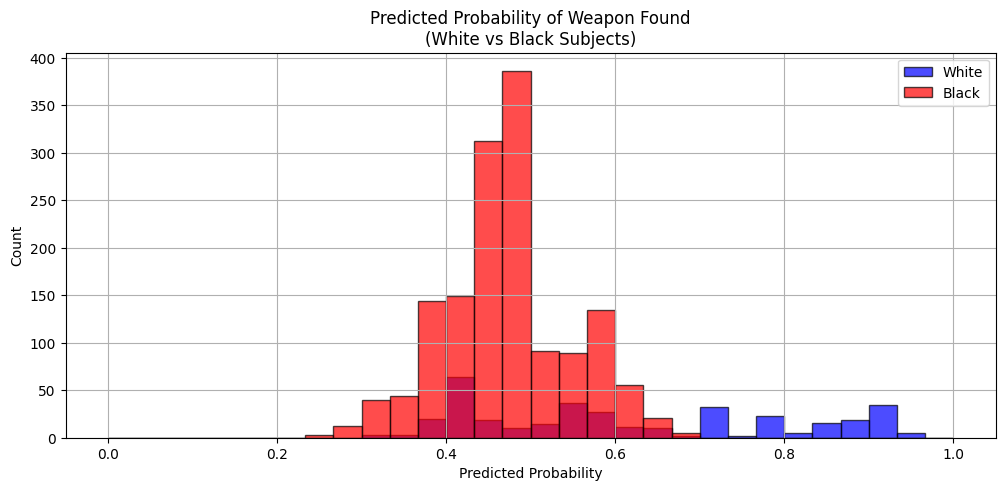

In [ ]:
X_test_reset = X_test.reset_index(drop=True)

white_positions = X_test_reset[X_test_reset['race_W'] == 1].index
black_positions = X_test_reset[X_test_reset['race_B'] == 1].index

white_preds = y_pred_proba[white_positions]
black_preds = y_pred_proba[black_positions]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.hist(white_preds, bins=30, range=(0,1), alpha=0.7, label='White', color='blue', edgecolor='black')
plt.hist(black_preds, bins=30, range=(0,1), alpha=0.7, label='Black', color='red', edgecolor='black')

plt.title('Predicted Probability of Weapon Found\n(White vs Black Subjects)')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


**Comment on the potential implications of this plot.**

"The histogram of predicted probabilities shows a notable difference between Black and White subjects.
The model tends to assign lower and more concentrated probabilities (around 0.4–0.6) to Black subjects, whereas for White subjects, the predicted probabilities are more spread out and often higher, with some predictions close to 1.0.

These differences suggest that the model's assessment of the likelihood that a weapon is found may vary by race.

Potential implications include model bias, disparate impacts on racial groups, and the need for careful evaluation of fairness in predictive policing applications.
Further analysis would be required to determine whether these differences are justified by differences in underlying data patterns or reflect bias inherited from historical policing practices."



**Repeat the above (fit a Random Forest Regressor and plot histograms of the predictions of the subsets of the test data for which the subject was white and black) but *removing the subject's race as a feature on which the model is fit*.**

New training feature shape without race: (12156, 5)
New testing feature shape without race: (3040, 5)
Best min_samples_leaf without race: {'min_samples_leaf': 100}


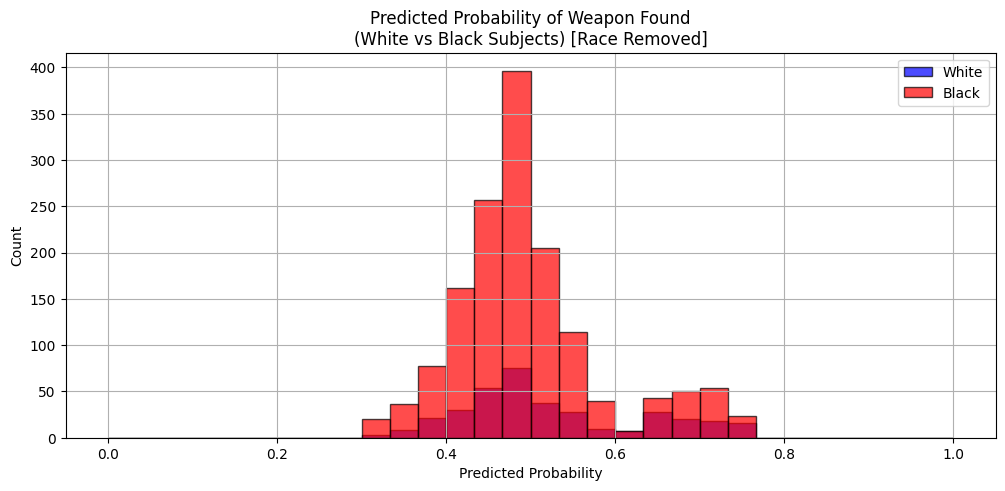

In [ ]:
race_cols = [col for col in X_train.columns if col.startswith('race_')]
X_train_norace = X_train.drop(columns=race_cols)
X_test_norace = X_test.drop(columns=race_cols)

print("New training feature shape without race:", X_train_norace.shape)
print("New testing feature shape without race:", X_test_norace.shape)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': [1, 5, 10, 20, 50, 100]
}

rf_reg_norace = RandomForestRegressor(random_state=302)

grid_search_reg_norace = GridSearchCV(
    rf_reg_norace,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_reg_norace.fit(X_train_norace, y_train)

print("Best min_samples_leaf without race:", grid_search_reg_norace.best_params_)

best_rf_reg_norace = grid_search_reg_norace.best_estimator_

y_pred_proba_norace = best_rf_reg_norace.predict(X_test_norace)

# Plot histograms (still group by race_W and race_B from earlier X_test)
import matplotlib.pyplot as plt

# Reset X_test index (needed to align)
X_test_reset = X_test.reset_index(drop=True)

# White and Black indices
white_positions = X_test_reset[X_test_reset['race_W'] == 1].index
black_positions = X_test_reset[X_test_reset['race_B'] == 1].index

white_preds_norace = y_pred_proba_norace[white_positions]
black_preds_norace = y_pred_proba_norace[black_positions]

plt.figure(figsize=(12, 5))

plt.hist(white_preds_norace, bins=30, range=(0,1), alpha=0.7, label='White', color='blue', edgecolor='black')
plt.hist(black_preds_norace, bins=30, range=(0,1), alpha=0.7, label='Black', color='red', edgecolor='black')

plt.title('Predicted Probability of Weapon Found\n(White vs Black Subjects) [Race Removed]')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


**Comment on these histograms in comparison to the previous histograms in which the subjects race was used to predict the outcome.**

When race was included as a feature, the model’s predicted probabilities differed considerably between Black and White subjects, with White subjects receiving a wider spread of high predicted probabilities.
When race was removed, the distributions for White and Black subjects became much more similar, suggesting that the inclusion of race directly influenced model predictions.
However, slight differences still remained, indicating that other correlated features might still indirectly carry racial information.
This highlights that while removing race reduces direct bias, complete fairness may require deeper fairness-aware modeling techniques beyond simply excluding protected attributes.

**Assuming that a probability over `0.5` indicates that the model predicts that a weapon will be found on the suspect, is the model that uses the race of a subject as a feature more or less accurate than the model that does not?**

In [ ]:
from sklearn.metrics import accuracy_score

# Threshold predictions at 0.5
# For model WITH race
y_pred_class_with_race = (y_pred_proba > 0.5).astype(int)

# For model WITHOUT race
y_pred_class_without_race = (y_pred_proba_norace > 0.5).astype(int)

# Calculate accuracy
accuracy_with_race = accuracy_score(y_test, y_pred_class_with_race)
accuracy_without_race = accuracy_score(y_test, y_pred_class_without_race)

print(f"Accuracy WITH race feature: {accuracy_with_race:.4f}")
print(f"Accuracy WITHOUT race feature: {accuracy_without_race:.4f}")


Accuracy WITH race feature: 0.5668
Accuracy WITHOUT race feature: 0.5401


"The Random Forest Regressor that included race as a feature achieved a higher test accuracy (56.68%) compared to the model without race (54.01%).
This suggests that race contains predictive information in the dataset.
However, while including race improves predictive performance, it may also embed and perpetuate existing biases, raising fairness concerns.
Therefore, there is a trade-off between maximizing accuracy and ensuring fairness and equity in model predictions."